In [1]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import os
data = pd.read_csv('../../../Documents/Com774_CW/Com774-CW2/train.csv', engine='python')
print(data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [6]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [8]:
pip install -U scikit-learn scipy matplotlib

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 358.3 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from htt


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1226 samples in 0.009s...
[t-SNE] Computed neighbors for 1226 samples in 0.767s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1226
[t-SNE] Computed conditional probabilities for sample 1226 / 1226
[t-SNE] Mean sigma: 1.710733
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.928131
[t-SNE] KL divergence after 300 iterations: 0.812404


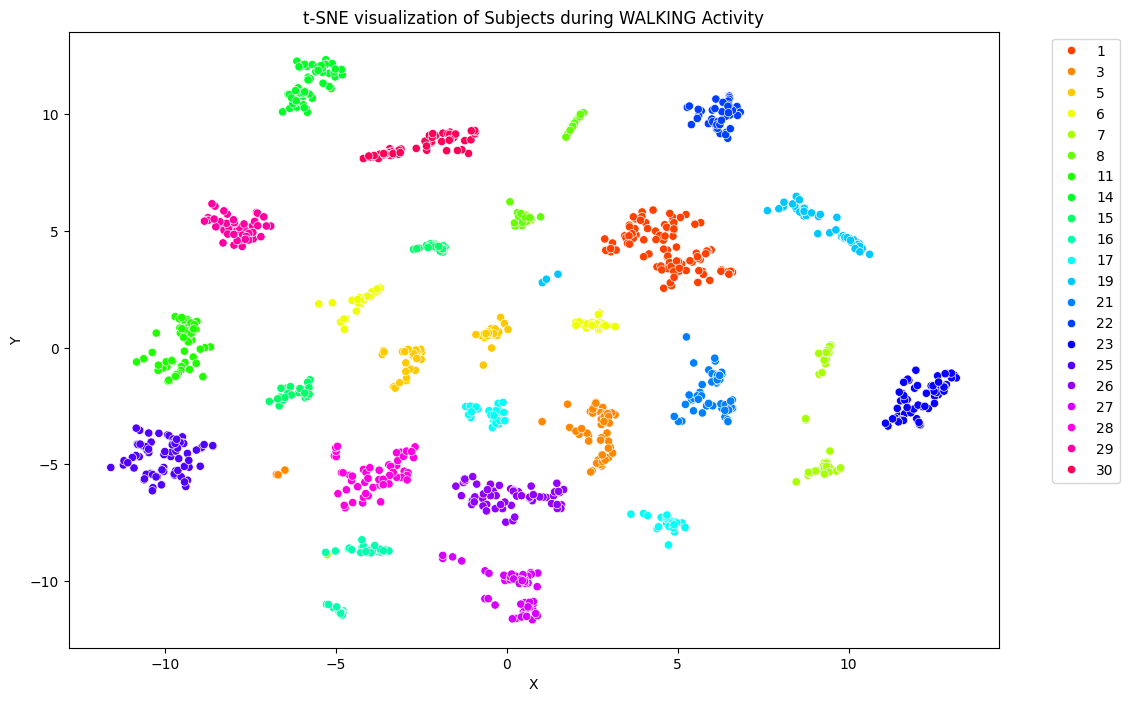

In [9]:
from sklearn.manifold import TSNE

# Filter for only "WALKING" activity
standing_data = data[data['Activity'] == 'WALKING']

# Separate features and subject labels
X_standing = standing_data.drop(['Activity', 'subject'], axis=1)
y_subject_standing = standing_data['subject']

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne_standing = tsne.fit_transform(X_standing)

# Create a DataFrame for the t-SNE results
tsne_standing_df = pd.DataFrame({'X': X_tsne_standing[:, 0], 'Y': X_tsne_standing[:, 1], 'Subject': y_subject_standing})
# Generate a unique color for each subject
num_subjects = y_subject_standing.nunique()
palette = sns.color_palette("hsv", num_subjects)

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Subject', data=tsne_standing_df, palette=palette)
plt.title('t-SNE visualization of Subjects during WALKING Activity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.037s...
[t-SNE] Computed neighbors for 7352 samples in 1.588s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.793972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.576393
[t-SNE] KL divergence after 300 iterations: 1.882068


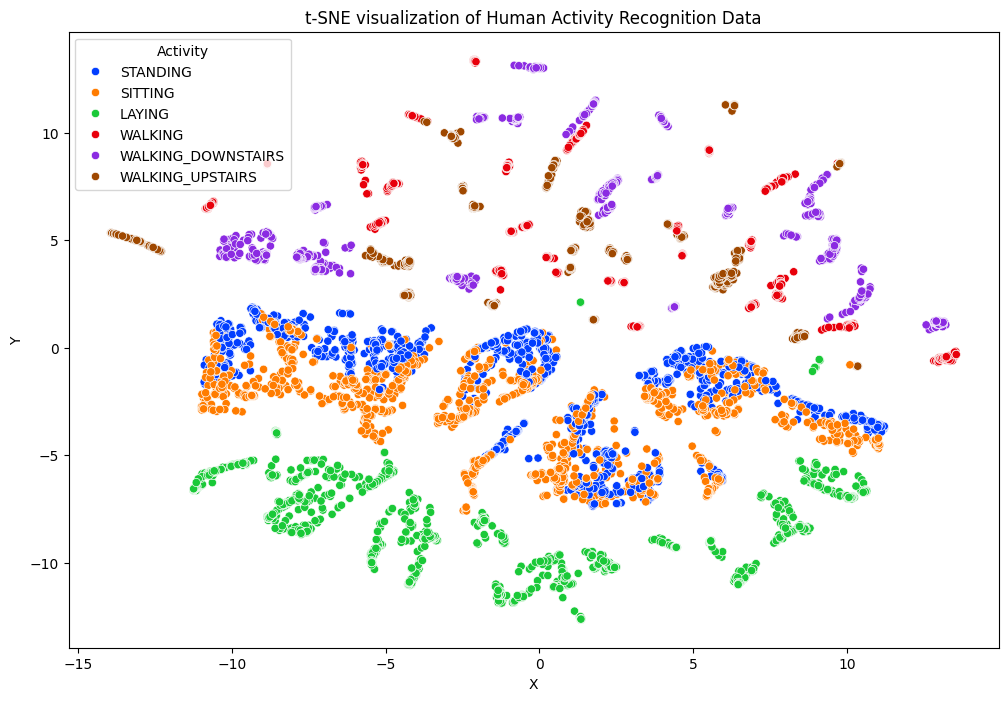

In [10]:
# Separate features and labels
X = data.drop('Activity', axis=1)
y = data['Activity']

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame({'X': X_tsne[:, 0], 'Y': X_tsne[:, 1], 'Activity': y})

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='Activity', data=tsne_df, palette='bright')
plt.title('t-SNE visualization of Human Activity Recognition Data')
plt.show()

In [11]:
#Classification Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Activity' is the target variable
X = data.drop('Activity', axis=1)  # Features
y = data['Activity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.96      0.96       262
          STANDING       0.96      0.96      0.96       276
           WALKING       1.00      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      0.98      0.99       206
  WALKING_UPSTAIRS       0.98      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



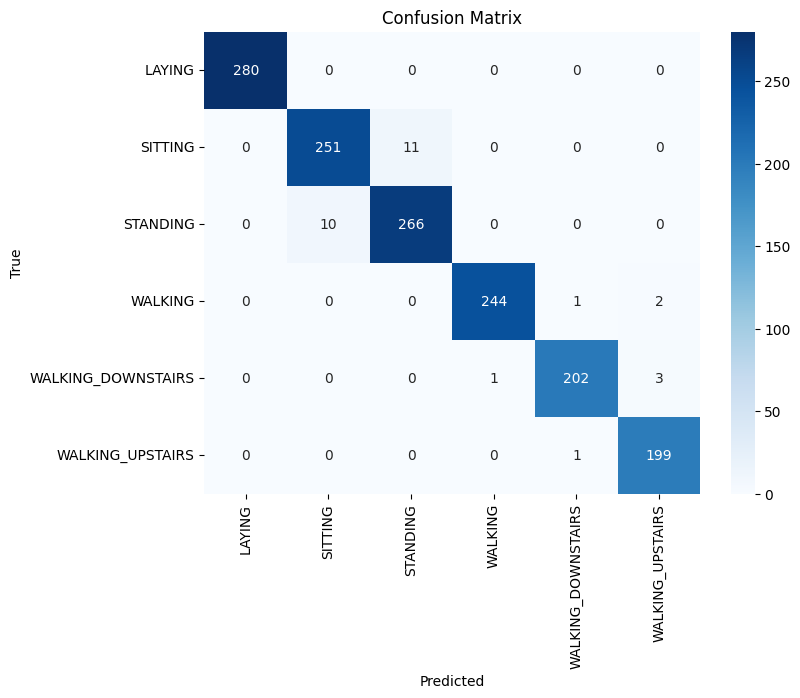

In [12]:
# Confusion Matrix for Classification Model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

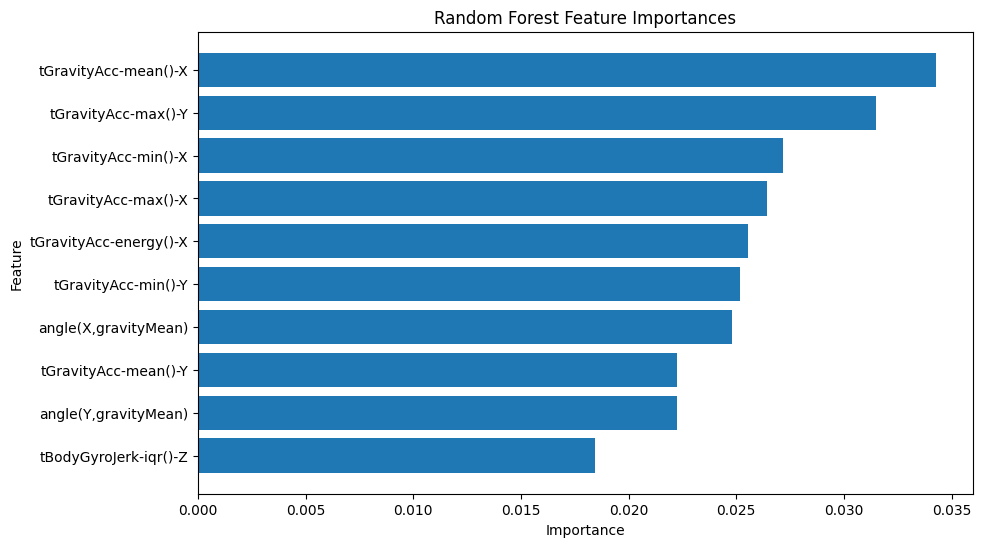

In [13]:
# Plot feature importance 
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame for visualization
feature_names = X_train.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [16]:
pip install tensorflow==1.2.0 --ignore-installed

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==1.2.0

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Assuming 'Activity' is the target variable
X = data.drop('Activity', axis=1)  # Features
y = data['Activity']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Reshape input for LSTM [samples, time steps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_categorical, epochs=100, batch_size=128, 
                    validation_data=(X_test_reshaped, y_test_categorical))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_categorical)
print("Accuracy: %.2f%%" % (accuracy * 100))

ModuleNotFoundError: No module named 'tensorflow'

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gb_classifier.classes_, yticklabels=gb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Plot feature importance
feature_importances = gb_classifier.feature_importances_

# Creating a DataFrame for visualization
feature_names = X_train.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()